In [39]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(ride_df, city_df, on="city")
# Display the data table for preview
df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [40]:
# Obtain the x and y coordinates for each of the three city types
rural_df             = df.loc[df['type']=="Rural"]
suburban_df          = df.loc[df['type']=="Suburban"]
urban_df             = df.loc[df['type']=="Urban"]

rural_driver         = (rural_df.groupby("city").mean())*10
rides_per_city_rural = rural_df.groupby("city").count()
average_fare_rural   = rural_df.groupby("city").mean()

suburban_driver      = (suburban_df.groupby("city").mean())*10
rides_per_city_sub   = suburban_df.groupby("city").count()
average_fare_sub     = suburban_df.groupby("city").mean()

urban_driver         = (urban_df.groupby("city").mean())*10
rides_per_city_urban = urban_df.groupby("city").count()
average_fare_urban   = urban_df.groupby("city").mean()

## Bubble Plot of Ride Sharing Data

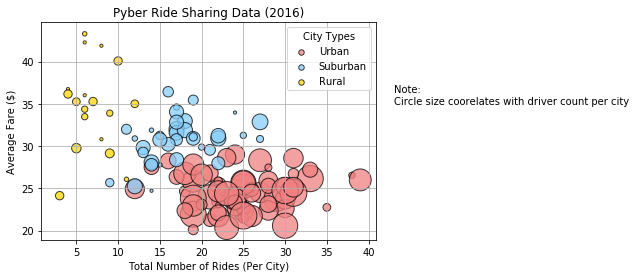

In [41]:
# Build the scatter plots for each city types
x_axis_urban = (rides_per_city_urban["ride_id"]).tolist()
y_axis_urban = average_fare_urban["fare"].tolist()
s_urban      = urban_driver["driver_count"].tolist()
plt_urban = plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors="lightcoral", edgecolors="black",
            s=s_urban, alpha=0.75, linewidths=1, label="Urban")

x_axis_sub   = rides_per_city_sub["ride_id"].tolist()
y_axis_sub   = average_fare_sub["fare"].tolist()
s_sub        = suburban_driver["driver_count"].tolist()
plt_sub = plt.scatter(x_axis_sub, y_axis_sub, marker="o",facecolors="lightskyblue", edgecolors="black",
            s=s_sub, alpha=0.75, linewidths=1, label="Suburban")

x_axis_rural = rides_per_city_rural["ride_id"].tolist()
y_axis_rural = average_fare_rural["fare"].tolist()
s_rural      = rural_driver["driver_count"].tolist()
plt_rural = plt.scatter(x_axis_rural, y_axis_rural, marker="o",facecolors="gold", edgecolors="black",
            s=s_rural, alpha=0.75, linewidths=1, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
# Create a legend
lgnd = plt.legend(handles=[plt_urban,plt_sub,plt_rural],title="City Types")
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
# Incorporate a text label regarding circle size
plt.text( 43,35,'Note:\nCircle size coorelates with driver count per city')
# Save Figure
plt.savefig("BubblePlot.png")
# Show plot
plt.show()

## Total Fares by City Type

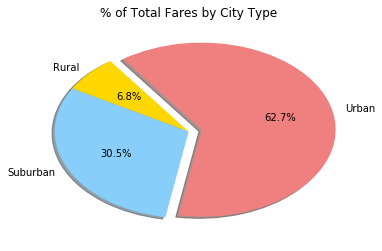

In [42]:
# Calculate Type Percents
total_fare    = df["fare"].sum()

urban_ride    = urban_df["fare"].sum()
urban_percent = urban_fare/total_fare*100

sub_fare      = suburban_df["fare"].sum()
sub_percent   = sub_fare/total_fare*100

rural_fare    = rural_df["fare"].sum()
rural_percent = rural_fare/total_fare*100

# Build Pie Chart
labels = ["Urban","Rural","Suburban"]
sizes = [urban_percent,rural_percent,sub_percent]
colors = ["lightcoral","gold","lightskyblue"]
plt.pie(sizes, explode=(0.1, 0, 0), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("FaresPieChart.png")
plt.show()

## Total Rides by City Type

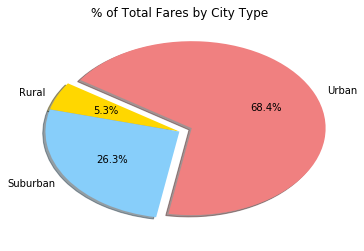

In [43]:
# Calculate Ride Percents
total_ride    = df["ride_id"].count()

urban_ride    = urban_df["ride_id"].count()
urban_percent = urban_ride/total_ride*100

sub_ride      = suburban_df["ride_id"].count()
sub_percent   = sub_ride/total_ride*100

rural_ride    = rural_df["ride_id"].count()
rural_percent = rural_ride/total_ride*100

# Build Pie Chart
labels = ["Urban","Rural","Suburban"]
sizes = [urban_percent,rural_percent,sub_percent]
colors = ["lightcoral","gold","lightskyblue"]
plt.pie(sizes, explode=(0.1, 0, 0), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("RidePieChart.png")
plt.show()


## Total Drivers by City Type

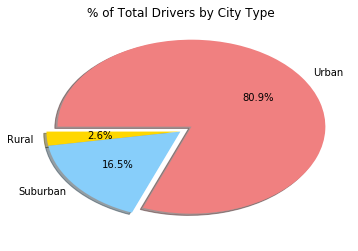

In [50]:
total    = city_df["driver_count"].sum()
drivers  = city_df.groupby("type").sum()
percent  = drivers/total*100

# Build Pie Charts

labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
sizes = drivers_percent["driver_count"].tolist()
plt.pie(sizes, explode=(0, 0, 0.1), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("DriverPieChart.png")
plt.show()

In [ ]:
Observation:
    1. Urban cities have the most drivers and most rides.
    2. Urban has relatively low fares/ride or fares/driver comparing to suburban and rural area.
    3. When average fair reduces, the number of rides and thus drivers increase.